In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import re
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN

In [2]:
data = pd.read_csv("trafficcrashes50k.csv")

C:\Users\deb10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head

<bound method NDFrame.head of           RD_NO CRASH_DATE_EST_I      CRASH_DATE  POSTED_SPEED_LIMIT  \
0      JC529096              NaN   11/30/19 1:49                  35   
1      JC529055              NaN   11/30/19 0:35                  30   
2      JC529023              NaN  11/29/19 23:56                  30   
3      JC529018              NaN  11/29/19 23:35                  30   
4      JC529019              NaN  11/29/19 23:21                  25   
5      JC529008              NaN  11/29/19 23:05                  30   
6      JC529030              NaN  11/29/19 22:40                  30   
7      JC528992              NaN  11/29/19 22:30                  30   
8      JC528968              NaN  11/29/19 22:21                  30   
9      JC528944              NaN  11/29/19 21:43                  30   
10     JC528954              NaN  11/29/19 21:30                  30   
11     JC528950              NaN  11/29/19 21:00                  20   
12     JC528914              NaN  

In [4]:
data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,49999.000000,10.000000,49999.000000,49999.000000,49620.000000,49504.000000,49504.000000,49504.000000,49504.000000,49504.000000,49504.000000,49504.0,49999.000000,49999.000000,49999.000000,49549.000000,49549.000000
mean,28.487970,1.600000,3568.671553,1265.197584,2.025595,0.198752,0.001050,0.020867,0.112658,0.064177,2.007838,0.0,13.112082,4.105282,8.877218,41.862035,-87.678118
std,5.817746,0.966092,2800.184641,702.808573,0.441401,0.562615,0.033011,0.166325,0.422837,0.318291,1.146440,0.0,5.568425,1.975518,1.452525,0.206434,0.398327
min,0.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,6.000000,0.000000,-87.934014
25%,30.000000,1.250000,1201.000000,733.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,8.000000,41.792642,-87.721827
50%,30.000000,2.000000,3100.000000,1222.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,9.000000,41.879735,-87.674754
75%,30.000000,2.000000,5421.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.928208,-87.634555
max,60.000000,3.000000,13751.000000,2535.000000,12.000000,15.000000,2.000000,5.000000,10.000000,10.000000,36.000000,0.0,23.000000,7.000000,11.000000,42.022720,0.000000


In [5]:
data.shape

(49999, 48)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 48 columns):
RD_NO                            49999 non-null object
CRASH_DATE_EST_I                 3498 non-null object
CRASH_DATE                       49999 non-null object
POSTED_SPEED_LIMIT               49999 non-null int64
TRAFFIC_CONTROL_DEVICE           49999 non-null object
DEVICE_CONDITION                 49999 non-null object
WEATHER_CONDITION                49999 non-null object
LIGHTING_CONDITION               49999 non-null object
FIRST_CRASH_TYPE                 49999 non-null object
TRAFFICWAY_TYPE                  49999 non-null object
LANE_CNT                         10 non-null float64
ALIGNMENT                        49999 non-null object
ROADWAY_SURFACE_COND             49999 non-null object
ROAD_DEFECT                      49999 non-null object
REPORT_TYPE                      48698 non-null object
CRASH_TYPE                       49999 non-null object
INTERSECTION_RE

In [7]:
data.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC529096,NaN,11/30/19 1:49,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,FOUR WAY,...,0.0,0.0,1.0,0.0,1,7,11,41.866541,-87.683312,POINT (-87.683311638372 41.866540919036)
1,JC529055,NaN,11/30/19 0:35,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,...,0.0,0.0,3.0,0.0,0,7,11,41.891774,-87.615315,POINT (-87.615314882915 41.891774296531)
2,JC529023,NaN,11/29/19 23:56,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,7.0,0.0,23,6,11,41.909381,-87.675683,POINT (-87.675682658411 41.909381253462)
3,JC529018,NaN,11/29/19 23:35,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,23,6,11,41.792426,-87.783176,POINT (-87.783176090264 41.792425778574)
4,JC529019,NaN,11/29/19 23:21,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,23,6,11,41.685782,-87.654192,POINT (-87.654191764848 41.685781645244)


In [8]:
#data_merged_dropped = data_merged.drop(["Year", "Office", "Postal"], axis=1)
data_zero_count = data
data_zero_count.isin([0]).sum()

RD_NO                                0
CRASH_DATE_EST_I                     0
CRASH_DATE                           0
POSTED_SPEED_LIMIT                 161
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
LANE_CNT                             2
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                          0
CRASH_TYPE                           0
INTERSECTION_RELATED_I               0
NOT_RIGHT_OF_WAY_I                   0
HIT_AND_RUN_I                        0
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION                     0
STREET_NAME              

In [9]:
#data_merged_dropped2['Party']=0
#data_merged_dropped2.loc[(data_merged_dropped2['Democratic']>data_merged_dropped2['Republican']), 'Party'] = 1

In [10]:
data.mean()

POSTED_SPEED_LIMIT                 28.487970
LANE_CNT                            1.600000
STREET_NO                        3568.671553
BEAT_OF_OCCURRENCE               1265.197584
NUM_UNITS                           2.025595
INJURIES_TOTAL                      0.198752
INJURIES_FATAL                      0.001050
INJURIES_INCAPACITATING             0.020867
INJURIES_NON_INCAPACITATING         0.112658
INJURIES_REPORTED_NOT_EVIDENT       0.064177
INJURIES_NO_INDICATION              2.007838
INJURIES_UNKNOWN                    0.000000
CRASH_HOUR                         13.112082
CRASH_DAY_OF_WEEK                   4.105282
CRASH_MONTH                         8.877218
LATITUDE                           41.862035
LONGITUDE                         -87.678118
dtype: float64

In [11]:
data2 = data

In [12]:
data2['Alignment2']=0
data2.loc[(data['ALIGNMENT']=="CURVE ON HILLCREST"), 'Alignment2'] = 1

In [13]:
data2.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,Alignment2
count,49999.000000,10.000000,49999.000000,49999.000000,49620.000000,49504.000000,49504.000000,49504.000000,49504.000000,49504.000000,49504.000000,49504.0,49999.000000,49999.000000,49999.000000,49549.000000,49549.000000,49999.000000
mean,28.487970,1.600000,3568.671553,1265.197584,2.025595,0.198752,0.001050,0.020867,0.112658,0.064177,2.007838,0.0,13.112082,4.105282,8.877218,41.862035,-87.678118,0.000300
std,5.817746,0.966092,2800.184641,702.808573,0.441401,0.562615,0.033011,0.166325,0.422837,0.318291,1.146440,0.0,5.568425,1.975518,1.452525,0.206434,0.398327,0.017318
min,0.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,6.000000,0.000000,-87.934014,0.000000
25%,30.000000,1.250000,1201.000000,733.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,8.000000,41.792642,-87.721827,0.000000
50%,30.000000,2.000000,3100.000000,1222.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,9.000000,41.879735,-87.674754,0.000000
75%,30.000000,2.000000,5421.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.928208,-87.634555,0.000000
max,60.000000,3.000000,13751.000000,2535.000000,12.000000,15.000000,2.000000,5.000000,10.000000,10.000000,36.000000,0.0,23.000000,7.000000,11.000000,42.022720,0.000000,1.000000


In [14]:
data3=data2.drop(["LANE_CNT","STREET_NO","CRASH_HOUR","CRASH_DAY_OF_WEEK","LATITUDE","LONGITUDE","RD_NO","CRASH_DATE_EST_I","CRASH_DATE","INJURIES_INCAPACITATING","INJURIES_NON_INCAPACITATING","INJURIES_REPORTED_NOT_EVIDENT","INJURIES_NO_INDICATION","INJURIES_UNKNOWN","TRAFFIC_CONTROL_DEVICE","DEVICE_CONDITION","WEATHER_CONDITION","LIGHTING_CONDITION","TRAFFICWAY_TYPE","ROADWAY_SURFACE_COND","MOST_SEVERE_INJURY","CRASH_MONTH","LOCATION","REPORT_TYPE","CRASH_TYPE","INTERSECTION_RELATED_I","HIT_AND_RUN_I","DAMAGE","STATEMENTS_TAKEN_I","DOORING_I","DATE_POLICE_NOTIFIED","SEC_CONTRIBUTORY_CAUSE","STREET_DIRECTION","STREET_NAME","PHOTOS_TAKEN_I","WORK_ZONE_I",], axis=1)
data3.describe()

,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,Alignment2
count,49999.000000,49999.000000,49620.000000,49504.000000,49504.000000,49999.000000
mean,28.487970,1265.197584,2.025595,0.198752,0.001050,0.000300
std,5.817746,702.808573,0.441401,0.562615,0.033011,0.017318
min,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,733.000000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,1222.000000,2.000000,0.000000,0.000000,0.000000
75%,30.000000,1824.000000,2.000000,0.000000,0.000000,0.000000
max,60.000000,2535.000000,12.000000,15.000000,2.000000,1.000000


In [15]:
data3.head()

,POSTED_SPEED_LIMIT,FIRST_CRASH_TYPE,ALIGNMENT,ROAD_DEFECT,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,Alignment2
0,35,FIXED OBJECT,STRAIGHT AND LEVEL,NO DEFECTS,N,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",1233,NaN,NaN,1.0,0.0,0.0,0
1,30,REAR END,STRAIGHT AND LEVEL,NO DEFECTS,NaN,UNABLE TO DETERMINE,1834,NaN,NaN,2.0,0.0,0.0,0
2,30,SIDESWIPE SAME DIRECTION,STRAIGHT AND LEVEL,NO DEFECTS,NaN,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",1424,NaN,NaN,2.0,0.0,0.0,0
3,30,SIDESWIPE SAME DIRECTION,STRAIGHT AND LEVEL,NO DEFECTS,NaN,IMPROPER OVERTAKING/PASSING,811,NaN,NaN,2.0,0.0,0.0,0
4,25,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,NO DEFECTS,NaN,UNABLE TO DETERMINE,2234,NaN,NaN,2.0,0.0,0.0,0


In [16]:
data3['Speed35']=0
data3.loc[(data2['POSTED_SPEED_LIMIT']>=35), 'Speed35'] = 1
data3['AnimalTrain']=0
data3.loc[((data2['FIRST_CRASH_TYPE']=='Animal')|(data2['FIRST_CRASH_TYPE']=='Animal')), 'AnimalTrain'] = 1
data3['Defect']=0
data3.loc[((data2['ROAD_DEFECT']=='SHOULDER DEFECT')|(data2['ROAD_DEFECT']=='WORN SURFACE')), 'Defect'] = 1
data3['RightOfWay']=0
data3.loc[(data2['NOT_RIGHT_OF_WAY_I']=='N'), 'RightOfWay'] = 1
data3['SpeedingOrDriverCond']=0
data3.loc[((data2['PRIM_CONTRIBUTORY_CAUSE']=='PHYSICAL CONDITION OF DRIVER')|(data2['PRIM_CONTRIBUTORY_CAUSE']=='EXCEEDING AUTHORIZED SPEED LIMIT')), 'SpeedingOrDriverCond'] = 1
data3['Construction']=0
data3.loc[(data2['WORK_ZONE_TYPE']=='CONSTRUCTION'), 'Construction'] = 1
data3['Workers']=0
data3.loc[(data2['WORKERS_PRESENT_I']=='Y'), 'Workers'] = 1
data3['7Units']=0
data3.loc[(data2['NUM_UNITS']>=7.0), '7Units'] = 1
data3['aFatal']=0
data3.loc[(data2['INJURIES_FATAL']>=1.0), 'aFatal'] = 1
data3['anInjury']=0
data3.loc[(data2['INJURIES_TOTAL']>=1.0), 'anInjury'] = 1

In [17]:
data3.head(100)

,POSTED_SPEED_LIMIT,FIRST_CRASH_TYPE,ALIGNMENT,ROAD_DEFECT,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,...,Speed35,AnimalTrain,Defect,RightOfWay,SpeedingOrDriverCond,Construction,Workers,7Units,aFatal,anInjury
0,35,FIXED OBJECT,STRAIGHT AND LEVEL,NO DEFECTS,N,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",1233,NaN,NaN,1.0,...,1,0,0,1,0,0,0,0,0,0
1,30,REAR END,STRAIGHT AND LEVEL,NO DEFECTS,NaN,UNABLE TO DETERMINE,1834,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
2,30,SIDESWIPE SAME DIRECTION,STRAIGHT AND LEVEL,NO DEFECTS,NaN,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",1424,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
3,30,SIDESWIPE SAME DIRECTION,STRAIGHT AND LEVEL,NO DEFECTS,NaN,IMPROPER OVERTAKING/PASSING,811,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
4,25,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,NO DEFECTS,NaN,UNABLE TO DETERMINE,2234,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
5,30,REAR END,STRAIGHT AND LEVEL,NO DEFECTS,NaN,UNABLE TO DETERMINE,1831,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
6,30,REAR END,STRAIGHT AND LEVEL,UNKNOWN,NaN,UNABLE TO DETERMINE,1935,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,1
7,30,REAR END,STRAIGHT AND LEVEL,UNKNOWN,NaN,UNABLE TO DETERMINE,2424,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
8,30,ANGLE,STRAIGHT AND LEVEL,NO DEFECTS,NaN,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",323,NaN,NaN,4.0,...,0,0,0,0,0,0,0,0,0,1
9,30,OTHER OBJECT,STRAIGHT AND LEVEL,NO DEFECTS,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH,1611,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data3.describe()

,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,Alignment2,Speed35,AnimalTrain,Defect,RightOfWay,SpeedingOrDriverCond,Construction,Workers,7Units,aFatal,anInjury
count,49999.000000,49999.000000,49620.000000,49504.000000,49504.000000,49999.000000,49999.000000,49999.0,49999.000000,49999.000000,49999.000000,49999.00000,49999.00000,49999.000000,49999.000000,49999.000000
mean,28.487970,1265.197584,2.025595,0.198752,0.001050,0.000300,0.085782,0.0,0.005100,0.004120,0.006360,0.00324,0.00166,0.000480,0.001020,0.146663
std,5.817746,702.808573,0.441401,0.562615,0.033011,0.017318,0.280044,0.0,0.071233,0.064056,0.079497,0.05683,0.04071,0.021904,0.031922,0.353773
min,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,30.000000,733.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1222.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
75%,30.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
max,60.000000,2535.000000,12.000000,15.000000,2.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000


In [19]:
data3.shape

(49999, 23)

In [20]:
data3.iloc[:,10:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 13 columns):
INJURIES_TOTAL          49504 non-null float64
INJURIES_FATAL          49504 non-null float64
Alignment2              49999 non-null int64
Speed35                 49999 non-null int64
AnimalTrain             49999 non-null int64
Defect                  49999 non-null int64
RightOfWay              49999 non-null int64
SpeedingOrDriverCond    49999 non-null int64
Construction            49999 non-null int64
Workers                 49999 non-null int64
7Units                  49999 non-null int64
aFatal                  49999 non-null int64
anInjury                49999 non-null int64
dtypes: float64(2), int64(11)
memory usage: 5.0 MB


In [21]:
data3.iloc[:,13:].info()
data3.iloc[:,23:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 10 columns):
Speed35                 49999 non-null int64
AnimalTrain             49999 non-null int64
Defect                  49999 non-null int64
RightOfWay              49999 non-null int64
SpeedingOrDriverCond    49999 non-null int64
Construction            49999 non-null int64
Workers                 49999 non-null int64
7Units                  49999 non-null int64
aFatal                  49999 non-null int64
anInjury                49999 non-null int64
dtypes: int64(10)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Empty DataFrame

In [22]:
data3.iloc[:,11:12].info()
data3[['INJURIES_TOTAL']] = data3[['INJURIES_TOTAL']].fillna(value=0)
data3[['INJURIES_FATAL']] = data3[['INJURIES_FATAL']].fillna(value=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 1 columns):
INJURIES_FATAL    49504 non-null float64
dtypes: float64(1)
memory usage: 390.7 KB


In [23]:
# Partition dataset into training and validation sets using holdout method
#Fatality, not dummied
#X_train, X_val, Y_train, Y_val = train_test_split(data3.iloc[:,13:], data3.iloc[:,11:12], test_size = 0.2, random_state = 1)
#Injury, not dummied
#X_train, X_val, Y_train, Y_val = train_test_split(data3.iloc[:,13:], data3.iloc[:,10:11], test_size = 0.2, random_state = 1)
#A fatality, dummied
#X_train, X_val, Y_train, Y_val = train_test_split(data3.iloc[:,13:23], data3.iloc[:,23:24], test_size = 0.2, random_state = 1)
#An injury, dummied
X_train, X_val, Y_train, Y_val = train_test_split(data3.iloc[:,13:23], data3.iloc[:,24:25], test_size = 0.2, random_state = 1)
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 19763 to 33003
Data columns (total 10 columns):
Speed35                 39999 non-null int64
AnimalTrain             39999 non-null int64
Defect                  39999 non-null int64
RightOfWay              39999 non-null int64
SpeedingOrDriverCond    39999 non-null int64
Construction            39999 non-null int64
Workers                 39999 non-null int64
7Units                  39999 non-null int64
aFatal                  39999 non-null int64
anInjury                39999 non-null int64
dtypes: int64(10)
memory usage: 3.4 MB


In [24]:
Y_train.head()
Y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 19763 to 33003
Empty DataFrame

In [25]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled_classification = scaler.transform(X_train)
x_val_scaled_classification = scaler.transform(X_val)

In [26]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import metrics

# # evaluating with all the predictors
# predictors = [0,1,2,3,4,5,6,7,8,9]
# classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 2)
# classifier.fit(x_train_scaled_classification[:,predictors] ,Y_train)
# y_pred = classifier.predict(x_val_scaled_classification[:,predictors])

# # confusion matrix
# conf_matrix = metrics.confusion_matrix(Y_val,y_pred)
# sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion matrix')
# plt.tight_layout()

# # evaluation metric
# accuracy = metrics.accuracy_score(Y_val, y_pred)
# error = 1 - metrics.accuracy_score(Y_val, y_pred)
# precision = metrics.precision_score(Y_val, y_pred, average = None)
# recall = metrics.recall_score(Y_val, y_pred, average = None)
# F1_score = metrics.f1_score(Y_val, y_pred, average = None)
# print([accuracy, error, precision, recall, F1_score])
# print("F1 score (average: macro) = {0}".format(metrics.f1_score(Y_val, y_pred, average = "macro")))
# print("F1 score (average: weighted) = {0}".format(metrics.f1_score(Y_val, y_pred, average = "weighted")))

In [27]:
data3.head()

,POSTED_SPEED_LIMIT,FIRST_CRASH_TYPE,ALIGNMENT,ROAD_DEFECT,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,...,Speed35,AnimalTrain,Defect,RightOfWay,SpeedingOrDriverCond,Construction,Workers,7Units,aFatal,anInjury
0,35,FIXED OBJECT,STRAIGHT AND LEVEL,NO DEFECTS,N,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",1233,NaN,NaN,1.0,...,1,0,0,1,0,0,0,0,0,0
1,30,REAR END,STRAIGHT AND LEVEL,NO DEFECTS,NaN,UNABLE TO DETERMINE,1834,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
2,30,SIDESWIPE SAME DIRECTION,STRAIGHT AND LEVEL,NO DEFECTS,NaN,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",1424,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
3,30,SIDESWIPE SAME DIRECTION,STRAIGHT AND LEVEL,NO DEFECTS,NaN,IMPROPER OVERTAKING/PASSING,811,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
4,25,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,NO DEFECTS,NaN,UNABLE TO DETERMINE,2234,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0


[0.037574797908631496, 0.9992511761495543]


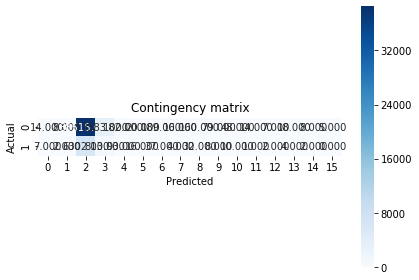

In [28]:
# CLUSTERING: DBSCAN
from sklearn.cluster import KMeans, DBSCAN

# Combination of predictors


x_train = data3[['Alignment2','AnimalTrain','Defect','RightOfWay','SpeedingOrDriverCond','Construction','Workers','7Units','Speed35']]


scaler = StandardScaler()
scaler.fit(x_train)
X_scaled = scaler.transform(x_train) 
#at least one injury
Y = data3['anInjury']
clustering = DBSCAN(eps = 2, min_samples = 5, metric = "euclidean").fit(X_scaled)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.03862247273727986, 0.9997047963855595]


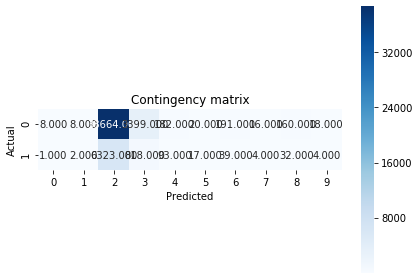

In [41]:
# CLUSTERING: DBSCAN
from sklearn.cluster import KMeans, DBSCAN

# Combination of predictors


x_train = data3[['Defect','RightOfWay','SpeedingOrDriverCond','7Units','Speed35']]


scaler = StandardScaler()
scaler.fit(x_train)
X_scaled = scaler.transform(x_train) 
#at least one injury
Y = data3['anInjury']
clustering = DBSCAN(eps = 2, min_samples = 5, metric = "euclidean").fit(X_scaled)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

In [ ]:
# Plot clusters found using hierarchical clustering with complete linkage method
data3['clusters'] = clusters
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Speed35', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'RightOfWay', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Defect', c = 'clusters', colormap = plt.cm.brg)

[0.038520689235119365, 0.9998805774757638]


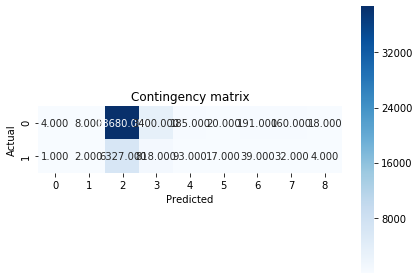

In [35]:
# CLUSTERING: DBSCAN
from sklearn.cluster import KMeans, DBSCAN

# Combination of predictors


x_train = data3[['Defect','RightOfWay','SpeedingOrDriverCond','Speed35']]


scaler = StandardScaler()
scaler.fit(x_train)
X_scaled = scaler.transform(x_train) 
#at least one injury
Y = data3['anInjury']
clustering = DBSCAN(eps = 2, min_samples = 5, metric = "euclidean").fit(X_scaled)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

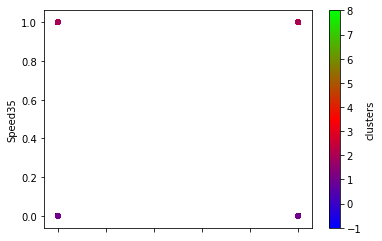

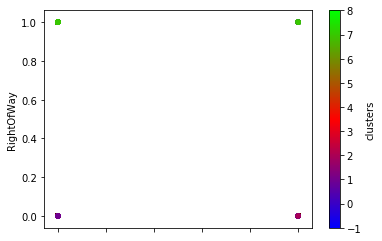

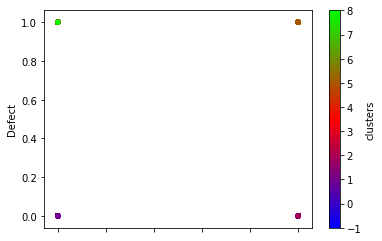

In [42]:
# Plot clusters found using hierarchical clustering with complete linkage method
data3['clusters'] = clusters
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Speed35', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'RightOfWay', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Defect', c = 'clusters', colormap = plt.cm.brg)

[0.015569775399023579, 0.9562742887185208]


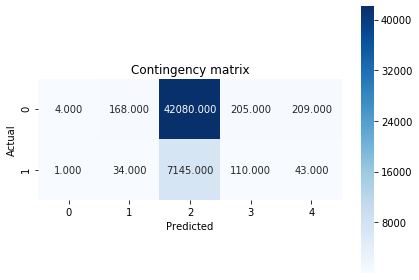

In [32]:
# CLUSTERING: DBSCAN
from sklearn.cluster import KMeans, DBSCAN

# Combination of predictors


x_train = data3[['Defect','RightOfWay','SpeedingOrDriverCond','Speed35']]


scaler = StandardScaler()
scaler.fit(x_train)
X_scaled = scaler.transform(x_train) 
#at least one injury
Y = data3['anInjury']
clustering = DBSCAN(eps = 5, min_samples = 10, metric = "euclidean").fit(X_scaled)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

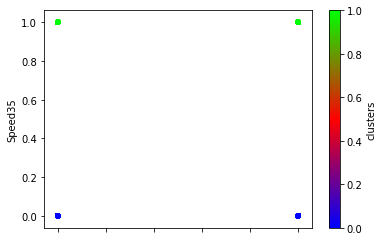

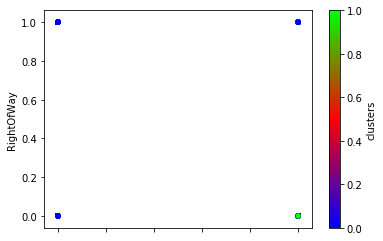

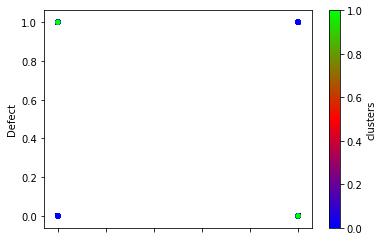

In [34]:
# Plot clusters found using hierarchical clustering with complete linkage method
data3['clusters'] = clusters
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Speed35', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'RightOfWay', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Defect', c = 'clusters', colormap = plt.cm.brg)

[0.03064108990608227, 0.9284831078611061]


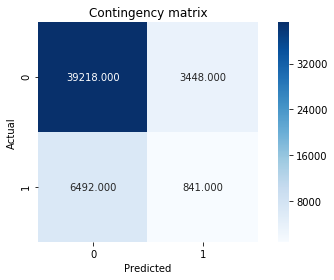

In [39]:
x_train = data3[['Defect','RightOfWay','SpeedingOrDriverCond','Speed35']]

scaler = StandardScaler()
scaler.fit(x_train)
X_scaled = scaler.transform(x_train) 
#at least one injury
Y = data3['anInjury']
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, random_state=1).fit(X_scaled)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

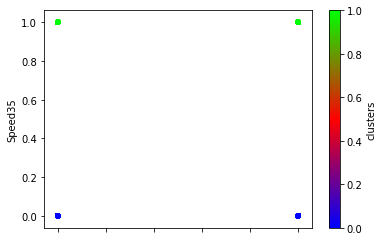

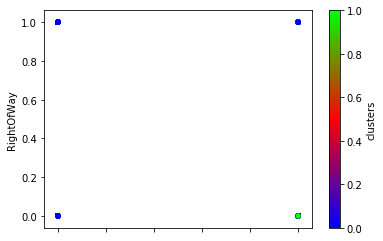

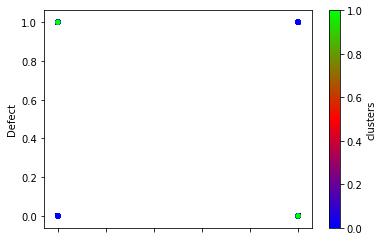

In [40]:
# Plot clusters found using hierarchical clustering with complete linkage method
data3['clusters'] = clusters
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Speed35', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'RightOfWay', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Defect', c = 'clusters', colormap = plt.cm.brg)

[0.03064108990608227, 0.9284831078611061]


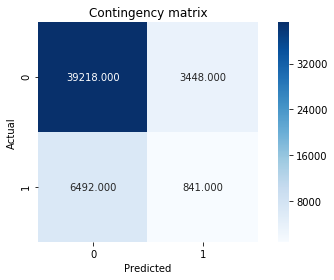

In [37]:
x_train = data3[['Defect','RightOfWay','SpeedingOrDriverCond','Speed35']]

scaler = StandardScaler()
scaler.fit(x_train)
X_scaled = scaler.transform(x_train) 
#at least one injury
Y = data3['anInjury']
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 20, random_state=1).fit(X_scaled)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

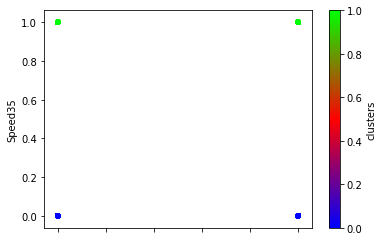

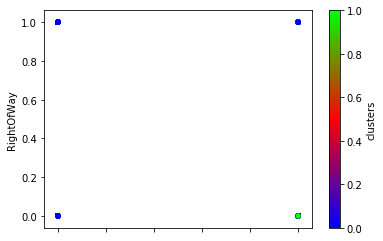

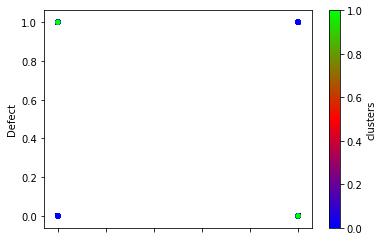

In [38]:
# Plot clusters found using hierarchical clustering with complete linkage method
data3['clusters'] = clusters
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Speed35', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'RightOfWay', c = 'clusters', colormap = plt.cm.brg)
ax = data3.plot(kind = 'scatter', x = 'anInjury', y = 'Defect', c = 'clusters', colormap = plt.cm.brg)